## Quick Guide


The notebook works as a simple script that calls data from CDMNext using CEIC's Python package, extracts all series from the selected insight, gets all timepoints for these series, builds dataframe, and create a grid of interactive plots with the given dataframes


> #### Installation Guide
>
> 1. Install Python 3.9+
> 2. Open terminal and execute
>  - pip install --extra-index-url https://downloads.ceicdata.com/python ceic_api_client
>  - pip install --extra-index-url https://downloads.ceicdata.com/python ceic_api_client --upgrade
---

> #### Usage Guide
>
> **Import libraries** - cell to define libraries we need to set before running the code<br />
> **Insight Information** - cell to define the insight we want to replicate<br />
> **Function Definitions** - to read or change the existing logic used by the main program<br />
> **DataFrames** - select the dataframes that are going to be plotted<br />
> **Code Execution** - run the main program based on parameters and functions<br />
> 
>
> Visit **[CEIC Main Page](https://www.ceicdata.com/en)** for more information on how to use our data and the PyCEIC package.
>

In [2]:
# Call the PyCEIC functionalities 
from ceic_api_client.pyceic import Ceic 

# Import malplotlib
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.image as image
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
from matplotlib import animation
from matplotlib.animation import FuncAnimation

import openpyxl
import numpy as np
import pandas as pd

from itertools import count
%matplotlib notebook

from datetime import datetime
import time

In [3]:
workbook = openpyxl.load_workbook(r'C:\Users\necheverry\OneDrive - Internet Securities, LLC\Documents\Documentos\CEIC\Scripts\Python\credentials.xlsx')
sheet = workbook.active
user = sheet['A2'].value
pasw = sheet['B2'].value
Ceic.login(user,pasw)

C:\Users\necheverry\Anaconda3\lib\site-packages\ceic_api_client\facade\pyceic_warnings.py:83: UserWarning: 
interaction interface to CEIC macroeconomic data and
any data usage abuse attempt will be recorded.
  warnings.warn(message=self._WARNING_MESSAGE, category=UserWarning)


### 1. Extract data from CDMNext

If you are not a client, proceed to step 3

In [4]:
def get_series_to_df(id_list, date):
    
    '''This function takes the id of a series and downloads the data points'''
    
    series_d = {} # Dictionary for daily series
    
    # Download the insight series
    result = Ceic.series(id_list, start_date=date)
    
    # Extract the time points
    for s in result.data:
        column = s.metadata.name
        time_points_dict = dict((tp._date, tp.value) for tp in s.time_points)
        series = pd.Series(time_points_dict)
        series_d[column] = series

    df = pd.DataFrame(series_d)
    
    # Converting the index as date
    df.index = pd.to_datetime(df.index)
    
    return df

In [5]:
# Series ID's
oil_list = ["42651401", "42651501"]

oil_date = '2021-06-01'

### 2. Explore the Data

In [6]:
oil_df = get_series_to_df(oil_list,oil_date)
oil_df

,Crude Oil: Spot Price: West Texas Intermediate Cushing,Crude Oil: Spot Price: Brent
2021-06-01,67.80,70.03
2021-06-02,68.79,70.60
2021-06-03,68.81,70.71
2021-06-04,69.57,71.30
2021-06-07,69.21,70.89
...,...,...
2023-09-07,86.87,91.16
2023-09-08,87.51,91.85
2023-09-11,87.30,91.97
2023-09-12,88.87,93.58


### 3. Basic line plot using matplotlib

This works with any dataframe that you have.

<IPython.core.display.Javascript object>


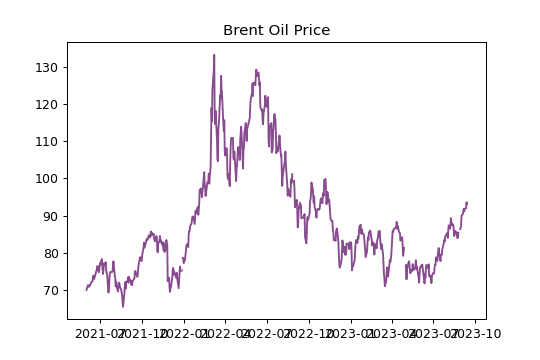

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

# Set title
ax.set_title('Brent Oil Price')

# Create the line
ax.plot(oil_df.index, oil_df.iloc[:,1], color= '#884b8f')

plt.show()
plt.savefig('brent_price_basic.png')

### 4. Basic animation

Let's take our basic line plot and turn it into an animation

<IPython.core.display.Javascript object>


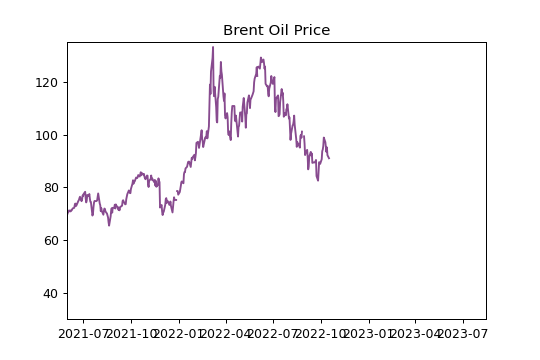

El tiempo de ejecución fue: 0.029886722564697266 segundos


In [8]:
start_time = time.time()

fig, ax = plt.subplots(figsize=(6,4))

# Set title
ax.set_title('Brent Oil Price')

# Set the min and max dates
min_date = datetime.strptime('2021-06-01', '%Y-%m-%d')
max_date = datetime.strptime('2023-08-15', '%Y-%m-%d')

# Set the limits for the axes
ax.set_ylim([30, 135])
ax.set_xlim([min_date,max_date])

brent = oil_df.iloc[:,1]
dates_vals = list(brent.index)

# Initialize the lines
line, = ax.plot([], [], color= '#884b8f', linestyle='-')

def init():  # Initialization function
    line.set_data([], [])
    return line

def animate(i):
    line.set_data(dates_vals[:i], brent.iloc[:i])
    return line

#Animation
ani = FuncAnimation(fig=fig, func=animate, frames=len(brent), init_func=init, blit=True)

plt.show()
# Save as mp4
# f = r"basic_anim_init.mp4"
# writervideo = animation.FFMpegWriter(fps=30) 
# ani.save(f, writer=writervideo, dpi=300)

# # #Save as gif
# f = r"basic_anim_init.gif" 
# writergif = animation.PillowWriter(fps=300) 
# ani.save(f, writer=writergif, dpi=300)

end_time = time.time()

print(f"El tiempo de ejecución fue: {end_time - start_time} segundos")

### 5. Add a second line plot

More data to add? Let's try to add another line t our animation

<IPython.core.display.Javascript object>


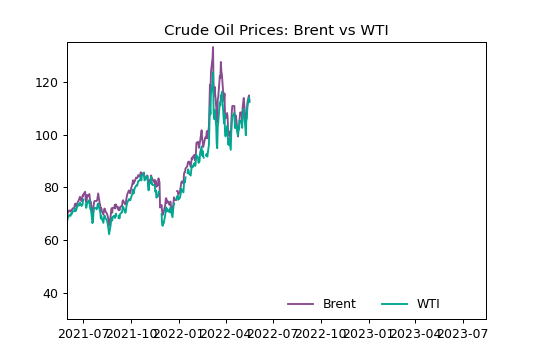

El tiempo de ejecución fue: 0.03632855415344238 segundos


In [9]:
start_time = time.time()

fig, ax = plt.subplots(figsize=(6,4))

# Set title
ax.set_title('Crude Oil Prices: Brent vs WTI')

# # Set the limits for the Y axis
min_date = datetime.strptime('2021-06-01', '%Y-%m-%d')
max_date = datetime.strptime('2023-08-15', '%Y-%m-%d')

# Set the limits for the Y axis
ax.set_ylim([30, 135])
ax.set_xlim([min_date,max_date])

brent = oil_df.iloc[:,1]
wti = oil_df.iloc[:,0]
dates_vals = list(brent.index)
dates_vals1 = list(wti.index)

# Initialize the lines
line, = ax.plot([], [], color= '#884b8f', linestyle='-', label='Brent')
line1, = ax.plot([], [], color= '#00A88F', linestyle='-', label='WTI')

#Legend
ax.legend(bbox_to_anchor=(0.5, -0.01), ncol=2, edgecolor='none', loc='lower left')

def init():  # Initialization function
    line.set_data([], [])
    line1.set_data([], [])
    return line

def animate(i):
    line.set_data(dates_vals[:i], brent.iloc[:i])
    line1.set_data(dates_vals1[:i], wti.iloc[:i])
    return line

#Animation
ani = FuncAnimation(fig=fig, func=animate, frames=len(brent), init_func=init, blit=True)

plt.show()
# Save as mp4
# f = r"oil_prices_anim.mp4"
# writervideo = animation.FFMpegWriter(fps=30) 
# ani.save(f, writer=writervideo, dpi=300)

# # #Save as gif
# f = r"basic_anim_init.gif" 
# writergif = animation.PillowWriter(fps=300) 
# ani.save(f, writer=writergif, dpi=300)

end_time = time.time()

print(f"El tiempo de ejecución fue: {end_time - start_time} segundos")

### 6. Customization

Our animation is now working, but is does not have the most professional look

<IPython.core.display.Javascript object>


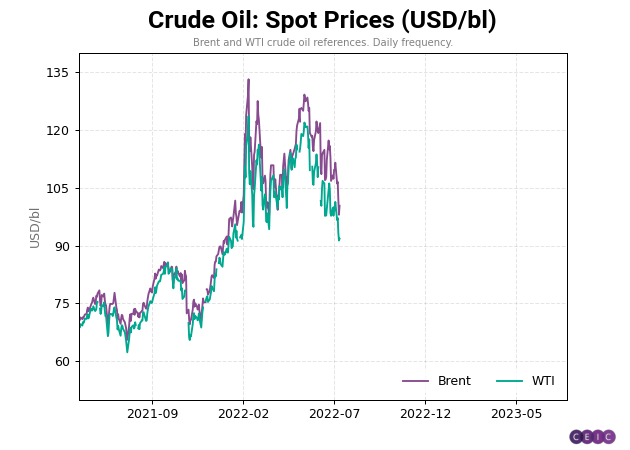

El tiempo de ejecución fue: 0.07770752906799316 segundos


In [10]:
start_time = time.time()

fig, ax = plt.subplots(figsize=(7,5))

# Add title
ax.set_title('Crude Oil: Spot Prices (USD/bl)', pad=20, fontsize=20, 
             font='roboto', weight='bold')

# Add subtitle
ax.annotate('Brent and WTI crude oil references. Daily frequency.',xy=(0.5,1.02), xytext=(0,0), xycoords='axes fraction',
            textcoords='offset points', ha='center', fontsize=8, color='grey')

# Label each axis 
ax.set_ylabel('USD/bl', color='#707070')

# Add CEIC logo
# Import logo in .png
im = r'C:\Users\necheverry\OneDrive - Internet Securities, LLC\Documents\Documentos\CEIC\Scripts\Python\ceic_logo_png-sinfondo.png'
img = mpimg.imread(im)

# Define the coordinates where the logo will be displayed
# The coordinates mean: left, bottom, width and height
ax_img = fig.add_axes([0.9, -0.035, 0.08, 0.08], anchor='NE', xticks=[], yticks=[], frame_on=False)
ax_img.imshow(img)

# Ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=8))

#Set the limits and the ticks for X axis and the date format
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Add gridlines
ax.grid(color='grey', alpha=0.2, linestyle='--')

# # Set the limits for the Y axis
min_date = datetime.strptime('2021-06-01', '%Y-%m-%d')
max_date = datetime.strptime('2023-08-15', '%Y-%m-%d')

# Set the limits for the Y axis
ax.set_ylim([50, 140])
ax.set_xlim([min_date,max_date])

brent = oil_df.iloc[:,1]
wti = oil_df.iloc[:,0]
dates_vals = list(brent.index)
dates_vals1 = list(wti.index)

# Initialize the lines
line, = ax.plot([], [], color= '#884b8f', linestyle='-', label='Brent')
line1, = ax.plot([], [], color= '#00A88F', linestyle='-', label='WTI')

def init():  # Initialization function
    line.set_data([], [])
    line1.set_data([], [])
    return line, line1

def animate(i): # Animate function
    line.set_data(dates_vals[:i], brent.iloc[:i])
    line1.set_data(dates_vals1[:i], wti.iloc[:i])
    return line, line1

#Legend
ax.legend(loc='lower right', ncol=2, edgecolor='none')

#Animation
ani = FuncAnimation(fig=fig, func=animate, frames=len(brent), init_func=init, blit=True)

plt.show()
# Save as mp4
# f = r"oil_prices_final.mp4"
# writervideo = animation.FFMpegWriter(fps=30) 
# ani.save(f, writer=writervideo, dpi=300)

# # #Save as gif
# f = r"basic_anim_init.gif" 
# writergif = animation.PillowWriter(fps=300) 
# ani.save(f, writer=writergif, dpi=300)

end_time = time.time()

print(f"El tiempo de ejecución fue: {end_time - start_time} segundos")

### 7. Add annotations

Want another tip? Let's add some annotations that highlights some events

<IPython.core.display.Javascript object>


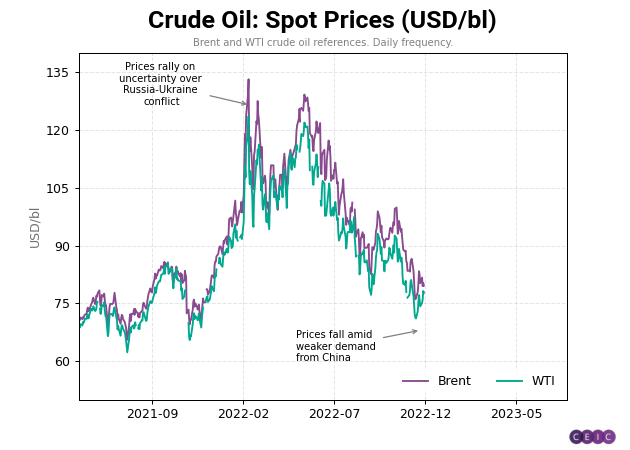

El tiempo de ejecución fue: 0.06702566146850586 segundos


In [12]:
start_time = time.time()

fig, ax = plt.subplots(figsize=(7,5))

# Add title
title = ax.set_title('Crude Oil: Spot Prices (USD/bl)', pad=20, fontsize=20, font='roboto', weight='bold')

# Add subtitle
subtitle = ax.annotate('Brent and WTI crude oil references. Daily frequency.',xy=(0.5,1.02), xytext=(0,0), xycoords='axes fraction',
            textcoords='offset points', ha='center', fontsize=8, color='grey')

# Label each axis 
ax.set_ylabel('USD/bl', color='#707070')

# Add CEIC logo
# Import logo in .png
im = r'C:\Users\necheverry\OneDrive - Internet Securities, LLC\Documents\Documentos\CEIC\Scripts\Python\ceic_logo_png-sinfondo.png'
img = mpimg.imread(im)

# Define the coordinates where the logo will be displayed
# The coordinates mean: left, bottom, width and height
ax_img = fig.add_axes([0.9, -0.035, 0.08, 0.08], anchor='NE', xticks=[], yticks=[], frame_on=False)
ax_img.imshow(img)

# Ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=8))

#Set the limits and the ticks for X axis and the date format
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Add gridlines
ax.grid(color='grey', alpha=0.2, linestyle='--')

# # Set the limits for the Y axis
min_date = datetime.strptime('2021-06-01', '%Y-%m-%d')
max_date = datetime.strptime('2023-08-15', '%Y-%m-%d')

# Set the limits for the Y axis
ax.set_ylim([50, 140])
ax.set_xlim([min_date,max_date])

brent = oil_df.iloc[:,1]
wti = oil_df.iloc[:,0]
dates_vals = list(brent.index)
dates_vals1 = list(wti.index)

# Initialize the lines
line, = ax.plot([], [], color= '#884b8f', linestyle='-', label='Brent')
line1, = ax.plot([], [], color= '#00A88F', linestyle='-', label='WTI')

#Legend
ax.legend(loc='lower right', ncol=2, edgecolor='none')

#Annotations
annotations_info = [
    {
        'date': datetime.strptime('2022-03-10', '%Y-%m-%d'),
        'props': {
            'text': 'Prices rally on \nuncertainty over \nRussia-Ukraine \nconflict',
            'xy': (0.35, 0.85),
            'xytext': (-70, 0),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 8,
            'ha': 'center',
            'va': 'baseline',
            'color': 'black',
            'weight': 'normal',
            'arrowprops': {
                'arrowstyle': '->',
                'color': 'grey'
            }
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    },
    {
        'date': datetime.strptime('2022-12-15', '%Y-%m-%d'),
        'props': {
            'text': 'Prices fall amid \nweaker demand \nfrom China',
            'xy': (0.7, 0.2),
            'xytext': (-100, 0),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 8,
            'ha': 'left',
            'va': 'top',
            'color': 'black',
            'weight': 'normal',
            'arrowprops': {
                'arrowstyle': '->',
                'color': 'grey'
            }
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    }
]

# Create the annotations and store them in a list
annotations = [ax.annotate(**info['props'], visible=info['visible']) for info in annotations_info]

def init():  # Initialization function
    line.set_data([], [])
    line1.set_data([], [])
    
    for annotation in annotations:
        annotation.set_visible(False)
        
    return line, line1, *annotations

def animate(i):
    line.set_data(dates_vals[:i], brent.iloc[:i])
    line1.set_data(dates_vals1[:i], wti.iloc[:i])
    
    # Update the visibility of annotations
    current_date = dates_vals[i].date()
    for annotation, info in zip(annotations, annotations_info):
        if current_date >= info['date'].date() and not annotation.get_visible():
            annotation.set_visible(True)
            
    return line, line1, *annotations

#Animation
ani = FuncAnimation(fig=fig, func=animate, frames=len(brent), init_func=init, blit=False, interval=5)

plt.show()
# # Save as mp4
# f = r"oil_prices_final_annotations.mp4"
# writervideo = animation.FFMpegWriter(fps=30) 
# ani.save(f, writer=writervideo, dpi=300)

# #Save as gif
# f = r"basic_anim_init.gif" 
# writergif = animation.PillowWriter(fps=300) 
# ani.save(f, writer=writergif, dpi=300)

end_time = time.time()

print(f"El tiempo de ejecución fue: {end_time - start_time} segundos")